In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sns.set_style('white')
sns.set_context("poster")

In [2]:
data = pd.read_csv('dataset/data_with_tags.csv')

In [3]:
data

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0
...,...,...,...,...,...,...,...
526116,top chef master expect much horrible experienc...,-1,3,877,53.0,28.0,33.0
526117,die hard foodie spends way much income eating ...,1,0,340,26.0,9.0,6.0
526118,dr vaughn miracle doctor came see doctor vaugh...,1,2,611,37.0,19.0,17.0
526119,went place yrs ago not crazy not back tonight ...,-1,1,225,11.0,8.0,8.0


In [4]:
data.describe()

,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
count,526121.000000,526121.000000,526121.000000,526121.000000,526121.000000,526121.000000
mean,-0.000032,1.589389,400.709890,25.092732,11.911980,13.500619
std,1.000001,5.513974,373.382025,23.555645,10.886125,14.019530
min,-1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,160.000000,10.000000,5.000000,5.000000
50%,-1.000000,1.000000,285.000000,18.000000,9.000000,9.000000
75%,1.000000,2.000000,507.000000,32.000000,15.000000,17.000000
max,1.000000,1608.000000,4745.000000,505.000000,189.000000,218.000000


In [5]:
## Useful got some aweful outliers

data['Useful'].unique()

array([   3,    5,    0,    1,    4,    2,    9,    7,   10,    8,   46,
         24,    6,   17,   39,   12,   23,   30,   11,   16,   14,   76,
         21,   13,   18,   22,   44,   29,   15,   35,   20,   75,   28,
         27,   19,   53,   26,   25,   33,   40,   32,   31,   57,  121,
         64,   41,   36,   51,   38,   37,   42,   34,   45,   56,   84,
         48,   61,   47,  128,   62,   68,   80,   43,   55,   77,   71,
         74,   66,   69,  615,   63,   92,  176, 1608,  286,   72,   52,
        134,   50,  108,   49,   86,   96,  397,   54,   85,   59,  178,
        500,   67,  110,   87,  463,   91, 1112,  150,  117,  647,   70,
        145,   58,   60,   94,   73,  113,  412,  777,   98,  130,  120,
        180,  245,   65,  190,  203,  181,  114,  782,  168,   89,  415,
        445,   99,  131,  132,  139,  255,  107,  165,  101,   82,  122,
        200,   79,  279,  643,   88,  127,  600,  358,   93,  161,  248,
         97,  118,  693,  954], dtype=int64)

In [6]:
#Removing Useful outliers


top_99 = data["Useful"].quantile(0.99)
data = data[data["Useful"] < top_99]

In [7]:
data.describe()

,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs
count,520789.000000,520789.000000,520789.000000,520789.000000,520789.000000,520789.000000
mean,0.003823,1.332231,395.492086,24.772153,11.781812,13.306813
std,0.999994,2.138093,365.631457,23.093926,10.700925,13.729505
min,-1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,159.000000,10.000000,5.000000,5.000000
50%,1.000000,1.000000,282.000000,18.000000,9.000000,9.000000
75%,1.000000,2.000000,501.000000,31.000000,15.000000,17.000000
max,1.000000,14.000000,4745.000000,505.000000,189.000000,218.000000


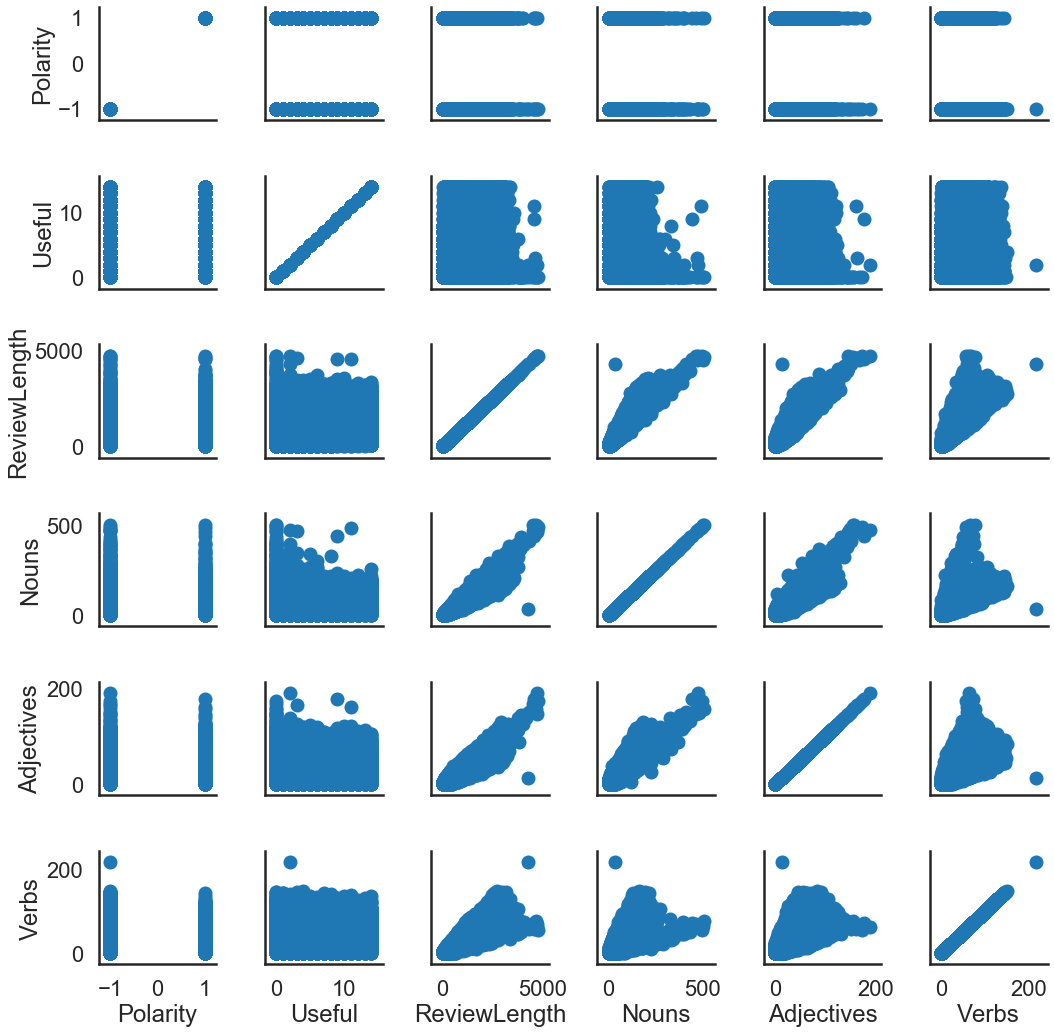

In [8]:
g = sns.PairGrid(data)
g.map(plt.scatter)

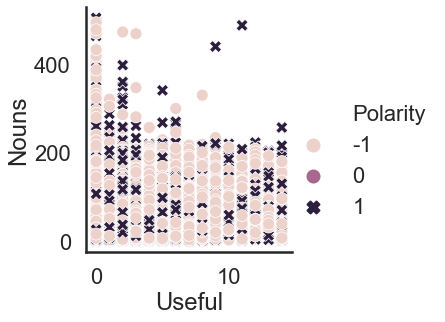

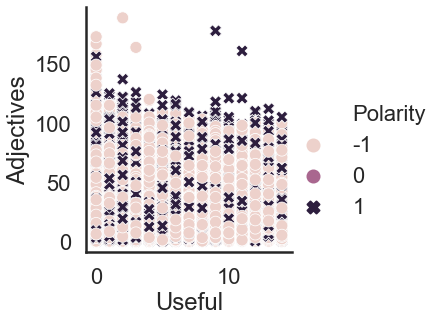

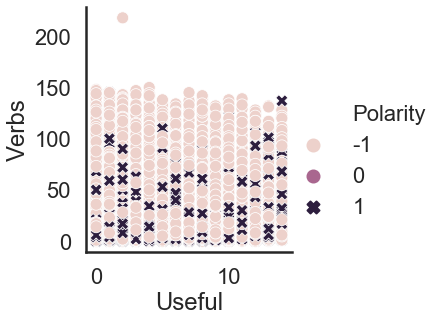

In [9]:
sns.relplot(x="Useful", y="Nouns", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="Useful", y="Adjectives", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="Useful", y="Verbs", data=data, hue="Polarity", style="Polarity");

In [10]:
data['Useful'].unique()

array([ 3,  5,  0,  1,  4,  2,  9,  7, 10,  8,  6, 12, 11, 14, 13],
      dtype=int64)

In [11]:
# Dividing the usefulness:
'''
 * < 2 Low
 * >= 2 High
''' 

def applyUsefulness(useful):
    if useful < 2:
        return 0 #return 'low'
    
    return 1 #return 'high'

In [12]:
UsefulnessColumn = data['Useful']
Usefulness = UsefulnessColumn.map(applyUsefulness)
data['UsefulnessPolarity'] = Usefulness 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data['UsefulnessPolarity'].unique()

array([1, 0], dtype=int64)

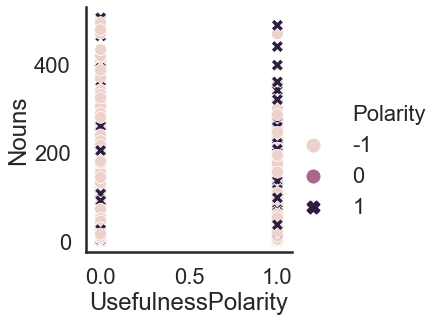

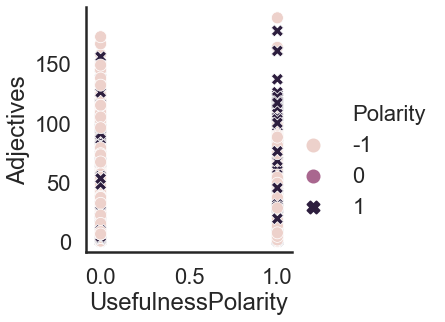

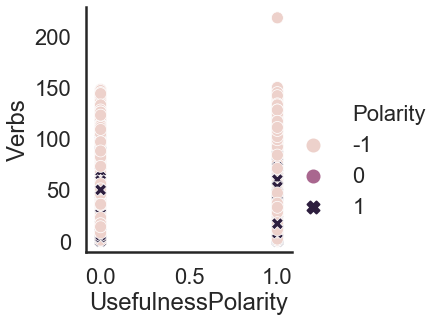

In [14]:
sns.relplot(x="UsefulnessPolarity", y="Nouns", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="UsefulnessPolarity", y="Adjectives", data=data, hue="Polarity", style="Polarity");
sns.relplot(x="UsefulnessPolarity", y="Verbs", data=data, hue="Polarity", style="Polarity");

### Models with only linguistic features

In [15]:
data.head()

,Review,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs,UsefulnessPolarity
0,tai stylist carol hair make wedding absolutely...,1,3,277,22.0,8.0,6.0,1
1,highly recommend sara looking great talented h...,1,5,1380,79.0,38.0,55.0,1
2,not know going costco could become hobby come ...,1,3,469,26.0,14.0,18.0,1
3,bit pricey consistently delicious service alwa...,1,0,106,4.0,6.0,1.0,0
4,ashley gave tour apartment nice helpful apartm...,1,0,70,4.0,5.0,1.0,0


In [16]:
data.corr()

,Polarity,Useful,ReviewLength,Nouns,Adjectives,Verbs,UsefulnessPolarity
Polarity,1.000000,-0.139732,-0.163123,-0.142449,-0.059749,-0.234519,-0.134112
Useful,-0.139732,1.000000,0.314276,0.300790,0.279250,0.313030,0.758963
ReviewLength,-0.163123,0.314276,1.000000,0.971990,0.936687,0.950818,0.273420
Nouns,-0.142449,0.300790,0.971990,1.000000,0.910543,0.891535,0.261051
Adjectives,-0.059749,0.279250,0.936687,0.910543,1.000000,0.835236,0.246939
Verbs,-0.234519,0.313030,0.950818,0.891535,0.835236,1.000000,0.270484
UsefulnessPolarity,-0.134112,0.758963,0.273420,0.261051,0.246939,0.270484,1.000000


In [17]:
dataToConsider = data[['Polarity', 'ReviewLength', 'Nouns', 'Adjectives', 'Verbs', 'UsefulnessPolarity']]

In [18]:
X = dataToConsider.drop('UsefulnessPolarity', axis = 1)
y = dataToConsider['UsefulnessPolarity']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 


### DecisionTreeClassifier

In [20]:

dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.7244811748260342


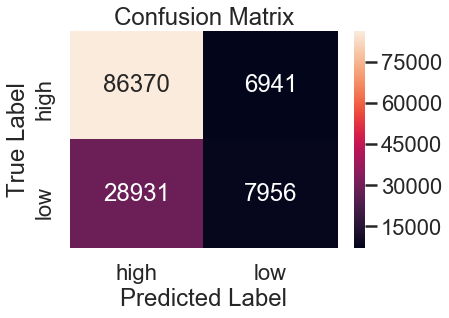

In [21]:
conf_mat = confusion_matrix(y_test, dtree_predictions)
class_label = [ "high","low"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

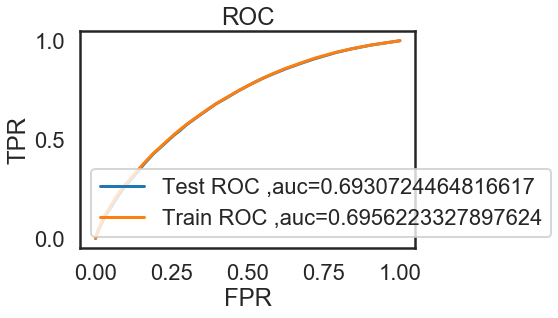

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

predi=dtree_model.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)

pred=dtree_model.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

### Random Forest Classifier

In [23]:
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6727676308391835


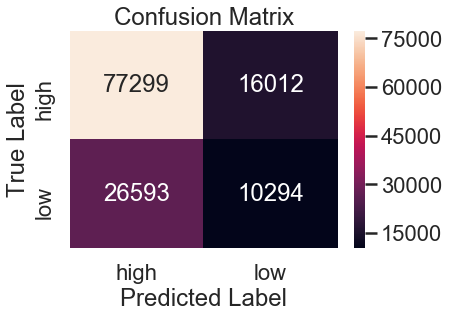

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["high", "low"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

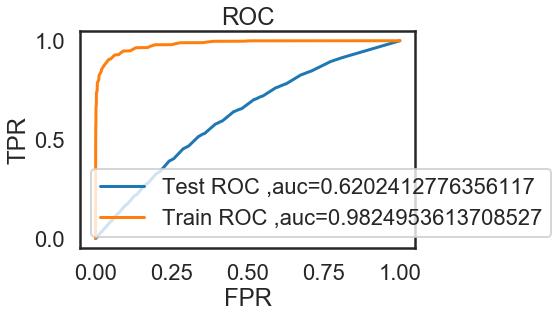

In [25]:
predi=classifier.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)

pred=classifier.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

### Naive Bayes classifier 

In [26]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print("Accuracy:",accuracy) 

Accuracy: 0.7205717445736494


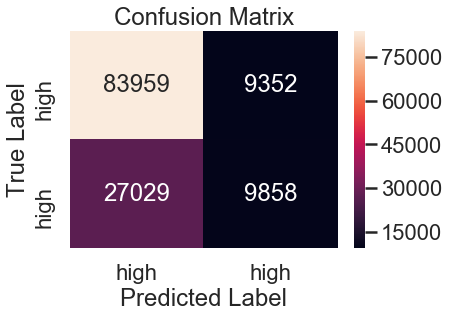

In [27]:
conf_mat = confusion_matrix(y_test, gnb_predictions)
class_label = ["high", "high"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


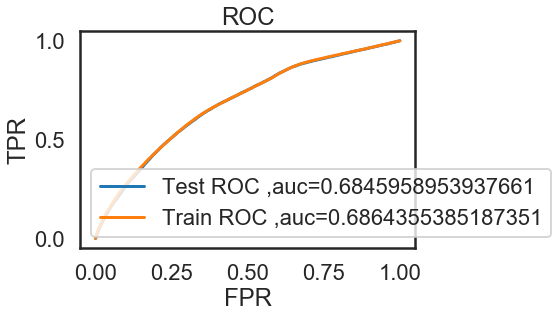

In [28]:
predi=gnb.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)

pred=gnb.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

### K Neighbors Classifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
y_pred = knn.predict(X_test)
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy)

0.6878600285718675


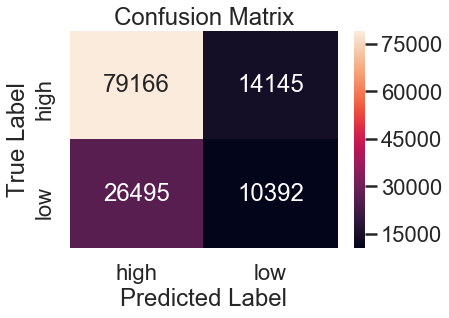

In [30]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["high", "low"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

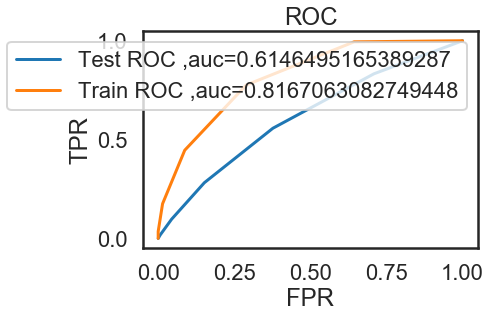

In [31]:

predi=knn.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)

pred=knn.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()